# Taller de Redes Neuronales Artificiales
## Entrenamiento de un aproximador

__Creado por:__ Angel Ayala ([Github](https://github.com/angel-ayala))

__Revisado:__ Francisco Cruz ([Sitio Web](http://www.franciscocruz.cl))

---

__Completado por:__ _indique su nombre aqui_

__Actualizado__: Viernes 7 de Mayo, 2021

__Fecha de Entrega__: Viernes 21 de Mayo, 2021

---

# Planteamiento del Problema
Se desea modelar la evolución de la biomasa en un bioproceso, el cual es alimentado cada cierto período de tiempo con un compuesto A, lo cual se expresa en un aumento de la masa de las materias vivas (biomasa) y una disminución – a medida que ésta crece – del alimento (sustrato) existente. Un esquema del bioproceso puede observarse en la Fig. 1.

El bioproceso al recibir compuesto A, produce un aumento de la masa de las materias vivas y una disminución, a medida que esta crece, del alimento o sustrato existente. La dinámica de las variables puede ser observada en la Fig. 2, donde e1, e2 y t1 corresponden al compuesto A, sustrato y biomasa respectivamente.

__Figura 1__: Bioproceso alimentado con compuesto A que impacta en la concentración de biomasa y el sustrato existente.

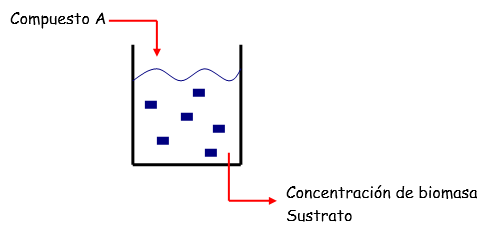

__Figura 2__: Dinámica del proceso entre las variables compuesto A, sustrato y biomasa.

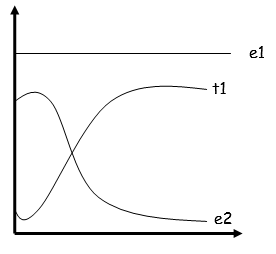

__Tabla 1__: Archivos necesarios para el laboratorio.

| Archivo | Significado en el bioproceso | Significado en la red neuronal |
|-------|---------|---------------------|
| compuestoA.txt | Compuesto A | Primera entrada |
| sustrato.txt | Sustrato | Segunda entrada |
| biomasa.txt | Biomasa | Salida |

El problema, entonces, consiste en utilizar una red neuronal prealimentada para aproximar el bioproceso, donde el compuesto A y el sustrato se consideran como entradas a la red y la biomasa su salida. Para ello, se deben seguir las reglas básicas de preprocesamiento de datos, diseño y validación de la red neuronal.

Estos datos se encuentran disponibles tres archivos de datos representando las entradas y el target, como se muestra el la Tabla 1.

In [6]:
#@title Librerias necesarias
import io
import requests
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#@title Función cargarTxt
def cargarTxt(url):
    """Recupera archivos desde url y lee con Numpy."""
    url_base = 'https://raw.githubusercontent.com/angel-ayala/notebooks/main/lab-biomasa/'
    response = requests.get(url_base + url)
    response.raise_for_status()
    data = np.loadtxt(io.BytesIO(response.content))

    return data

In [15]:
#@title Cargar datos desde repositorios
i1 = cargarTxt('compuestoA.txt')
i2 = cargarTxt('sustrato.txt')
t1 = cargarTxt('biomasa.txt')
print('Datos cargados')

Datos cargados


# Actividades

## Preprocesamiento de los datos
1. Graficar las variables de entrada y la salida del bioproceso, para observar el comportamiento general del proceso y eliminar datos claramente erróneos
o faltantes (outliers).
2. Identifique el rango de variación de cada una de las variables. Utilice para ello, los comandos min y max.
3. Dividir los datos en dos conjuntos: uno para entrenamiento y otro para validación.

In [ ]:
# plotear los datos
plt.plot(i1, label='Compuesto A')
plt.plot(i2, label='Sustrato')
plt.plot(t1, label='Salida')
plt.title('Visualización de los datos')
plt.legend()
plt.show()

In [18]:
# identificar los rangos
print('i1', i1.min(), i1.max())
print('i2', i2.min(), i2.max())
print('t1', t1.min(), t1.max())

i1 0.0 10.0
i2 -0.68959323 10.58033973
t1 -0.38979487 8.76451353


In [ ]:
# Preprocesar los datos
# Para Hacer!

In [19]:
# separacion en subconjuntos
i1Train = i1[0:1400]
i1Val = i1[1400:2000]

i2Train = i2[0:1400]
i2Val = i2[1400:2000]

y_train = t1[0:1400]
y_val = t1[1400:2000]

x_train = np.vstack((i1Train, i2Train)).transpose()
x_val = np.vstack((i1Val, i2Val)).transpose()
inputnn = np.vstack((i1, i2)).transpose()

## Diseño de una red neuronal

4. Diseñe la red neuronal a utilizar.
  - Determine según el número de ejemplos disponibles Ne – número de entradas, Nc – número de elementos en la capa escondida y Ns – número de salidas.
5. Crear una red prealimentada, utilizando PyTorch
6. Entrenarla utilizando el comando train con el algoritmo $E_{cm}$.
7. De acuerdo al gráfico del performance verifique el diseño de la red.

In [20]:
#@title Importar librería de PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [29]:
#@title Definir modelo
class MLP(nn.Module):
    def __init__(self, n_features, n_neurons, n_output):
        super().__init__()
        self.z1 = nn.Linear(n_features, n_neurons, bias=True)
        self.z2 = nn.Linear(n_neurons, n_output, bias=True)

    def forward(self, x):
        z1 = self.z1(x)
        s1 = torch.tanh(z1)
        z2 = self.z2(s1)

        return z2

In [66]:
#@title Definir función de entrenamiento
def entrenar(model, X, y, epocas, alfa):
    # Instanciación de la función objetivo
    loss_fn = nn.MSELoss(reduction='sum')
    # Función de optimización
    optimizer = optim.Adam(model.parameters(),
                        lr=alfa)
    # Histórico de desempeño
    error = []
    
    # loop de entrenamiento
    for t in range(epocas):
        # Paso Feedforward
        y_pred = model(X)

        # Calcular el error
        loss = loss_fn(y_pred, y)
        error.append(loss.item())

        # Limpiar los gradientes
        optimizer.zero_grad()

        # Calcular gradiente y retropropagar
        loss.backward()

        # Actualizar los pesos del modelo
        optimizer.step()

    return error

In [67]:
#@title Entrenamiento del modelo
# definir alfa y cantidad de épocas
alfa = 0.1
epocas = 500

# parámetros del modelo
n_features = ...
n_neurons = ...
n_output = ...

# convertir valores en tensores
X = torch.from_numpy(x_train).float()
y = torch.from_numpy(y_train[:, np.newaxis]).float()

# Instanciación del modelo
modelo = MLP(n_features, n_neurons, n_output)
error = entrenar(modelo, X, y, epocas, alfa)

## Validación del Modelo Neuronal

8. Evaluar simulando el conjunto de test en comparación con el target.
9. Reducir el número total de parámetros Nw con el fin simplificar el modelo.
10. Validar utilizando los indicadores según Nw:
  - IA 
  \begin{equation}
    1 - \frac{\sum_{i=1}^n (o_i - p_i)^2}{\sum_{i=1}^n (|o_i'| + |p_i'|)^2}
  \end{equation}
  - Root Mean Square
  \begin{equation}
    \sqrt \frac{\sum_{i=1}^n (o_i - p_i)^2}{\sum_{i=1}^n o_i^2}
  \end{equation}
  - Residual Standard Deviation
  \begin{equation}
    \sqrt \frac{\sum_{i=1}^n (o_i - p_i)^2}{N}
  \end{equation}
  con:
      - $o_i$, valores predichos.
      - $p_i$, valores observados.
      - $N$, número total de datos.
      - $o_m$, valor medio de las observaciones.
      - $o_i' = o_i - o_m$
      - $p_i' = p_i - o_m$

In [71]:
# Definir función IA
def ia_error(y_true, y_pred):
    """
    Calculo del error IA
    Args:
        y_true (list): valores observados.
        y_pred (list): valores predichos.
    Return:
        error (float): valor del error calculado.
    """
    raise NotImplementedError('La función aún se ha definido.')
    error = ...
    return error

In [72]:
# Definir función rms
def rms_error(y_true, y_pred):
    """
    Calculo del error Root Mean Square
    Args:
        y_true (list): valores observados.
        y_pred (list): valores predichos.
    Return:
        error (float): valor del error calculado.
    """
    raise NotImplementedError('La función aún no se ha definido.')
    error = ...
    return error

In [73]:
# Definir función RSD
def rsd_error(y_true, y_pred):
    """
    Calculo del error Residual Standard Deviation
    Args:
        y_true (list): valores observados.
        y_pred (list): valores predichos.
    Return:
        error (float): valor del error calculado.
    """
    raise NotImplementedError('La función aún no se ha definido.')
    error = ...
    return error

In [ ]:
# convertir valores en tensores
val_data = torch.from_numpy(x_val).float()

# predicciones sin actualizar gradientes
with torch.no_grad():
    val_pred = modelo(val_data)

error_ia = ia_error(y_val, val_pred)
error_rms = rms_error(y_val, val_pred)
error_rsd = rsd_error(y_val, val_pred)

print("resultados de entrenamiento",
      f"error IA {error_ia:.4f}",
      f"error RMS {error_rms:.4f}",
      f"error RSD {error_rsd:.4f}")

In [ ]:
plt.plot(y_val, label='Salida observada')
plt.plot(val_pred.flatten().tolist(), label='Salida predicha')
plt.title('Resultados del entrenamiento')
plt.grid()
plt.legend()
plt.show()

# Comente

### Primera parte

(a) En el gráfico de los datos de los archivos, indique cuáles son las entradas y los targets a la red.

(b) Explique el preprocesamiento de datos realizado.

(c) Justifique cómo hizo la selección de los conjuntos de entrenamiento y validación.

_Responda aqui_

### Segunda parte
(a) Explicar cómo se determinaron las constantes Ne, Nc y Ns.

(b) Calcule Nw. ¿Satisface la condición Nw < númeroDeEjemplos/10?

(c) Explicite completamente el diseño de la red y los parámetros de entrenamiento.

_Responda aqui_

### Tercera parte
(a) Analice los resultados de simulación. ¿Está conforme con el modelo neuronal?

(b) Revise los posibles fallos: sobreparametrización y sobreentrenamiento.

(c) Haga las correcciones correspondientes.

_Responda aqui_

#### Observaciones:
- Debes crear una copia del notebook y guardarlo en Google Drive.
- En la [sección comente](#scrollTo=SjGbcqS2f2p3&line=1&uniqifier=1), se debe explicar en las celdas de textos lo solicitado.

#### Evaluación:
- Para evaluar tu trabajo debes compartir el notebook y enviar el link a <aaam@ecomp.poli.br> con copia a <francisco.cruz@ucentral.cl>
- El notebook debe tener como nombre "Taller IA02 - Biomasa - _nombreAlumno_.ipynb"
  - Ejemplo "Taller IA - Biomasa - Alan Turing.ipynb"